In [3]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score

In [4]:
df=pd.read_csv('Cust_Segmentation.csv')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


- Customer Id
- Age: Age of Customer
- Edu: Education level of the customers
- Years Employed: Number of years customer has been employed at their current job

In [5]:
df.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'Address', 'DebtIncomeRatio'],
      dtype='object')

In [6]:
df_cust=df.drop('Address', axis=1)
df_cust=df_cust[['Years Employed', 'DebtIncomeRatio']]
df_cust.head()

,Years Employed,DebtIncomeRatio
0,6,6.3
1,26,12.8
2,10,20.9
3,4,6.3
4,31,7.2


In [7]:
from sklearn.preprocessing import StandardScaler

In [15]:
std_scaler=StandardScaler()
X=std_scaler.fit_transform(df_cust)
# X=pd.DataFrame(X,columns=['Years Employed',	'DebtIncomeRatio'])

In [16]:
np.array(X)

array([[-0.37878978, -0.57652509],
       [ 2.5737211 ,  0.39138677],
       [ 0.2117124 ,  1.59755385],
       ...,
       [-1.26454304,  3.45892281],
       [ 0.50696349, -1.08281745],
       [ 1.09746566, -0.2340332 ]])

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

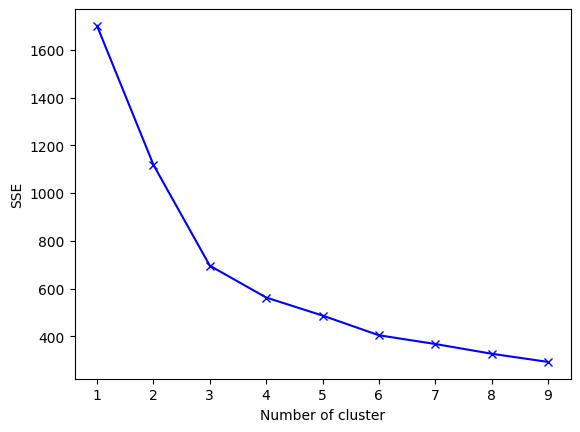

In [10]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    X["clusters"] = kmeans.labels_
    # print(X["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [11]:
silhouette_coefficients=[]
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    score= silhouette_score(X, label, metric='euclidean')
    silhouette_coefficients.append(score)

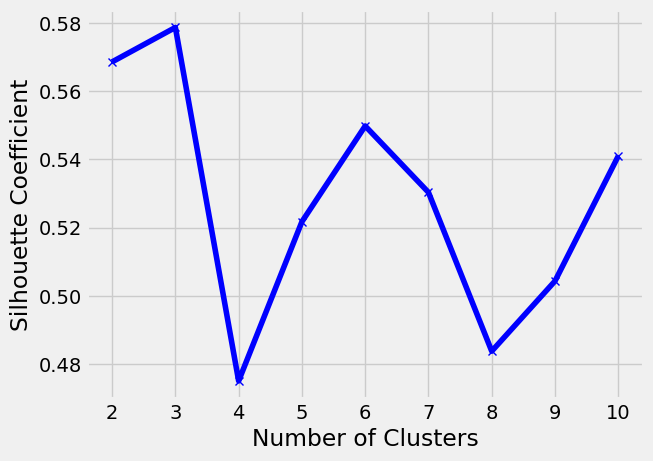

In [20]:
# plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients, 'bx-')
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()